In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.layers import Input, Dense
sns.set()

In [ ]:
csv_path="BTC-USD.csv"
df=pd.read_csv(csv_path,parse_dates=['Date'])
df=df.sort_values('Date')
print(df)

           Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2833 2022-06-20  20553.371094  20913.322266  19689.169922  20599.537109   
2834 2022-06-21  20594.294922  21620.628906  20415.062500  20710.597656   
2835 2022-06-22  20719.414063  20835.750000  19848.078125  19987.029297   
2836 2022-06-23  19986.607422  21135.761719  19950.117188  21085.876953   
2837 2022-06-24  21112.822266  21319.255859  20786.849609  21310.503906   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200

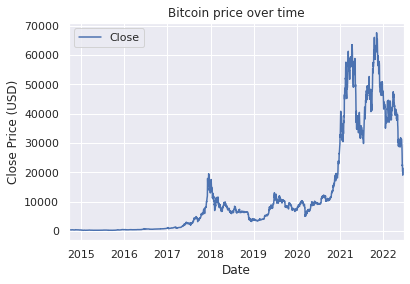

In [ ]:
ax=df.plot(x='Date', y='Close')
ax.set_title("Bitcoin price over time")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
plt.show()

In [ ]:
shifted_rows=100
df['Prediction']=df[['Close']].shift(-shifted_rows)
print(df['Prediction'])

0       327.924011
1       315.863007
2       317.239014
3       312.670013
4       310.737000
           ...    
2833           NaN
2834           NaN
2835           NaN
2836           NaN
2837           NaN
Name: Prediction, Length: 2838, dtype: float64


In [ ]:
training_data=np.array(df[['Close']][:-shifted_rows])
print(training_data)

y=(df['Prediction'].values)[:-shifted_rows]
print(y)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [39666.753906]
 [39338.785156]
 [41143.929688]]
[  327.924011   315.863007   317.239014 ... 19987.029297 21085.876953
 21310.503906]


In [ ]:
x_train,x_test,y_train, y_test= train_test_split(training_data , y,test_size = 20 )

In [ ]:
linReg=LinearRegression()
linReg.fit(x_train,y_train)
linReg_confidence=linReg.score(x_test,y_test)
print(linReg_confidence)

0.7038359739273556


In [ ]:
future_values=np.array(df[['Close']][-shifted_rows:])
linReg_prediction=linReg.predict(future_values)

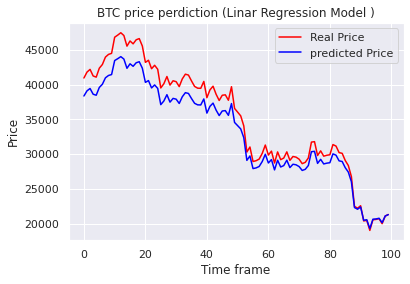

In [ ]:
plt.plot(future_values, 'red', label ='Real Price')
plt.plot(linReg_prediction,'blue',label='predicted Price')
plt.xlabel('Time frame')
plt.ylabel('Price')
plt.title('BTC price perdiction (Linar Regression Model )')
plt.legend()
plt.show()

In [ ]:
svr_rbf=SVR(kernel='rbf',C=1e2,gamma=0.01)
svr_poly=SVR(kernel='poly',C=1e3,degree=2)
y_rbf=svr_rbf.fit(x_train,y_train)
y_poly=svr_poly.fit(x_test,y_test)

In [ ]:
future_values=np.array(df[['Close']][-shifted_rows:])
y_rbf_prediction=svr_rbf.predict(future_values)
y_poly_prediction=svr_poly.predict(future_values)

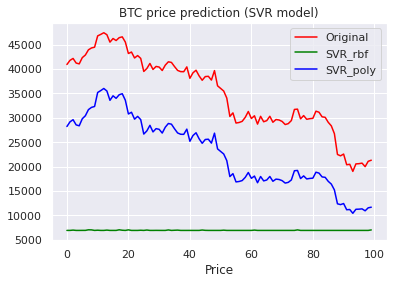

In [ ]:
 plt.plot(future_values,'red', label='Original')
 plt.plot(y_rbf_prediction, 'green',label='SVR_rbf')
 plt.plot(y_poly_prediction,'blue',label='SVR_poly')
 plt.xlabel('Price')
 plt.title('BTC price prediction (SVR model)')
 plt.legend()
 plt.show()

In [ ]:

NN_model=Sequential()

NN_model.add(Dense(128,kernel_initializer='normal',input_dim=x_train.shape[1],activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(x_train,y_train, epochs=50 ,batch_size=32,validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               256       
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 165,121
Trainable params: 165,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
68/68 [==============================

In [ ]:
future_values=np.array(df[['Close']][-shifted_rows:])
NN_pred=NN_model.predict(future_values)

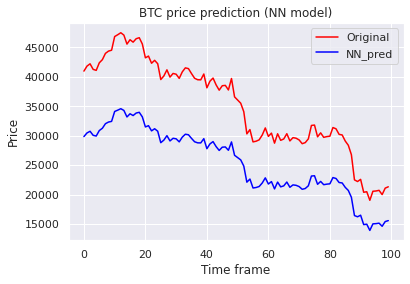

In [ ]:
plt.plot(future_values,'red',label='Original')
plt.plot(NN_pred,'blue',label='NN_pred')
plt.xlabel('Time frame')
plt.ylabel('Price')
plt.title('BTC price prediction (NN model)')
plt.legend()
plt.show()
